In [0]:
import pandas as pd


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/pseudo_facebook.csv')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train=df

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [0]:
train.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [0]:
train['gender'].fillna('NaN',inplace=True)

male      58574
female    40254
NaN         175
Name: gender, dtype: int64


'male'

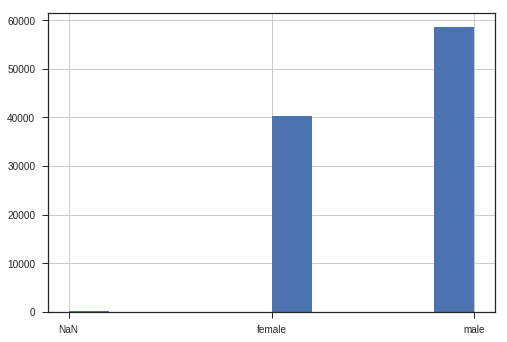

In [0]:
train['gender'].hist(bins=10)
print(train['gender'].value_counts())
max(train['gender'])

5196

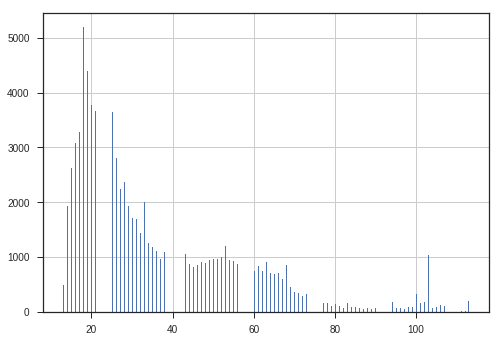

In [0]:
train['age'].hist(bins=500)
train['age'].value_counts()
max(train['age'].value_counts())

In [0]:
train.head()
train.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [0]:
train=train.drop(columns=['userid', 'dob_day','dob_month','friendships_initiated','likes_received','www_likes_received','www_likes'])
train

,age,dob_year,gender,tenure,friend_count,likes,mobile_likes,mobile_likes_received
0,14,1999,male,266.0,0,0,0,0
1,14,1999,female,6.0,0,0,0,0
2,14,1999,male,13.0,0,0,0,0
3,14,1999,female,93.0,0,0,0,0
4,14,1999,male,82.0,0,0,0,0
5,14,1999,male,15.0,0,0,0,0
6,13,2000,male,12.0,0,0,0,0
7,13,2000,female,0.0,0,0,0,0
8,13,2000,male,81.0,0,0,0,0
9,13,2000,male,171.0,0,0,0,0


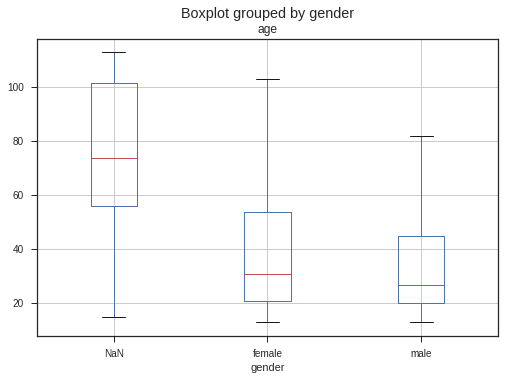

In [0]:
ct=pd.crosstab(df['age'], df['gender'])
train.boxplot(column='age' ,by='gender')

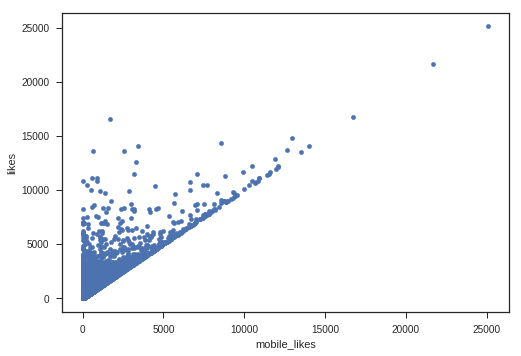

In [0]:
train.plot('mobile_likes','likes',kind='scatter')

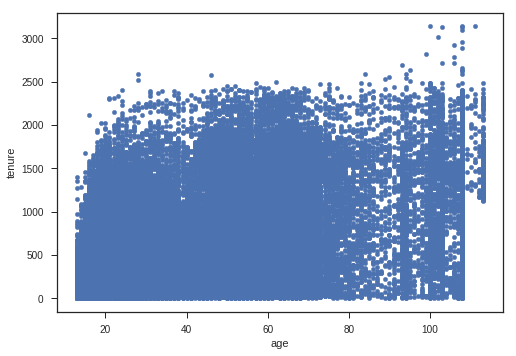

In [0]:
train.plot('age','tenure',kind='scatter')

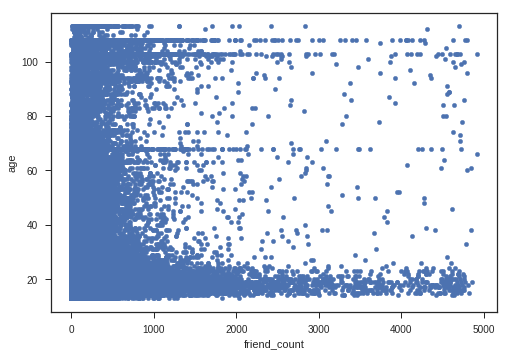

In [0]:
train.plot('friend_count','age',kind='scatter')

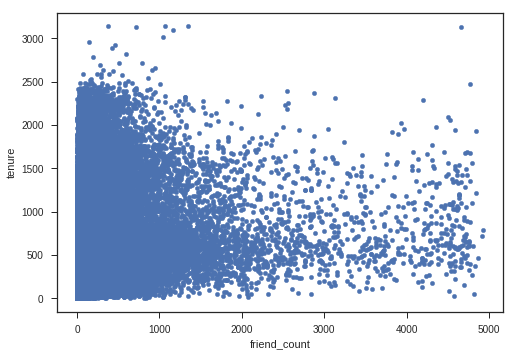

In [0]:
train.plot('friend_count','tenure',kind='scatter')